In [2]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [121]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0, t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
    
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = -self.v[i]
                
    def CheckWallLimit(self,limits,dim=3):
        
        for i in range(dim):
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
    
    def CheckGolpe(self):
        for i in range(2):
            self.v[i] = - self.v[i]

        
    
    def darFuerza(self, r2_, R2_, K_ ):
        f = 0
        norm = 0
        norm = np.linalg.norm(self.r - r2_)
        condi = self.radius + R2_
        n = [(r2_[0]-self.r[0])/norm, (r2_[1]-self.r[1])/norm]
        if norm < condi:
             f = K_*(norm**3)* n
        else:
             f = np.zeros( (len(n)) )
        
            
    
    def FuerzaEntrePartıculas(self, N_, IdExterno_, r2_, R2_):
        #N_ = número de particulas en la mesa de billar
        Fuerza = []
        for i in range(N_): 
            fue = 0
            if self.Id != IdExterno:
                fue = self.darFuerza(self, r2_, R2_)
                Fuerza.append(fue)
            else:
                pass
        
    
    def darEnergiaPotencial(self, f_, r2_, R2_):
        liminf = self.r 
        limsup = self.r-r2_
        resta = 0
        RadioEsfera = (self.r + self.R)
        for i in range(len(self.r)):
            rr1 = self.r[i]
            rr2 = r2_[i]
            resta += (rr1-rr2)**2
        norm = resta**(1/2)
        EPot = 0
        if norm < RadioEsfera:
            for i in range(len(Self.darFuerza())):
                EPot += self.darFuerza()[i]
                
    def darEnergiaCinetica(self):
        for i in range(len(vx_)):
            k = (((((self.rVector[0]**2)+(self.rVector[0]**2))**(1/2))**2)*self.m)/2
    
    def darEnergiaTotal(self):
        
        
                
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) 
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])

In [135]:
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)
print(len(t))

def GetParticles(X0_, v0_, a0_, NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = X0_[i]
        v0 = v0_[i]
        a0 = a0_[i]
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

Limits = np.array([20.,20.])

def RunSimulation( X0_, v0_, a0_, t,NParticles = 1, Velo = 50):
    
    Particles = GetParticles( X0_, v0_, a0_, NParticles,Limits[0],Velo = Velo,dt=dt)
    
                
                
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            for j in range(len(Particles)):
                if i == j:
                    pass
                else:
                    norm = np.linalg.norm(Particles[i].GetPositionVector() - Particles[j].GetPositionVector())
                    R1 = Particles[i].GetR()
                    R2 = Particles[j].GetR()
                    Res = R1+R2
                    if norm <= Res:
                        Particles[i].CheckGolpe()
                        Particles[j].CheckGolpe()
                        Particles[i].Evolution(it)
        
        
    return Particles
X0 = np.array([[0., 0.],[0., -1.6], [-15., -15.]])
V0 = np.array([[20., 0.],[0., 0.], [0., 0.]])
a0 = np.array([[0., 0.],[0., 0.], [0., 0.]]) 

Particles = RunSimulation( X0, V0, a0, t,3,Velo=5)

def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,10)


def darTiempoRebote(P_, dt_):
    ran  = 0.001
    pos = 0 
    pp = P_.GetPositionVector()[:,1]
    for i in range(len(pp)-100):
        posactual    = pp[i]
        possiguiente = pp[i+100]
        resta1 = abs(posactual - possiguiente)

        if resta1 <= ran :
            pos += i
            break
    tiempo = dt_*pos
    return tiempo

3001


100%|██████████| 3001/3001 [00:01<00:00, 2973.09it/s]


<IPython.core.display.Javascript object>


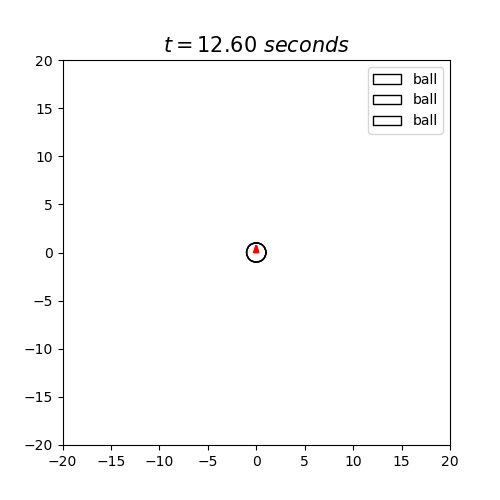

0.0


In [136]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

print(Particles[0].GetVelocityVector()[3000,1])
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
         
        vx = p.GetVelocityVector()[i*10,0]
        vy = p.GetVelocityVector()[i*10,1] 
    
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False, label = 'ball')
        
        plot = plt.arrow(x, y,vx,vy,color='r',head_width=0.5)
        
        plot = ax.add_patch(circle)
        plt.legend()
    return plot


Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)
plt.show()